In [ ]:
import pandas as pd

X = pd.read_csv("X_train .csv")
y_call = pd.read_csv("Y_train_call.csv")
y_put = pd.read_csv("Y_train_put.csv")

In [ ]:
Y_final = pd.concat([y_call, y_put], axis=1)

In [ ]:
import pandas as pd
import numpy as np

# === 1) Assume DataFrame Structure ===
# - features_df: shape (n_samples, 43)
# - targets_df: shape (n_samples, 52)

features_df = X
targets_df =  Y_final

# === 2) Compute Pearson Correlation Matrix ===
# Loop over each feature vs all targets
corr_matrix = pd.DataFrame(index=features_df.columns, columns=targets_df.columns)

for feature in features_df.columns:
    for target in targets_df.columns:
        corr = features_df[feature].corr(targets_df[target])
        corr_matrix.loc[feature, target] = corr

corr_matrix = corr_matrix.astype(float)

# === 3) Aggregate Correlation Strength per Feature ===
# Use mean absolute correlation as a relevance score
feature_scores = corr_matrix.abs().mean(axis=1).sort_values(ascending=False)

# === 4) Display Ranked Features by Relevance Score ===
ranked_features = pd.DataFrame({
    'feature': feature_scores.index,
    'mean_abs_corr': feature_scores.values
})

print("🔍 Feature Relevance via Mean Absolute Pearson Correlation:")
print(ranked_features)

# Optional: Save
ranked_features.to_csv("feature_relevance_scores.csv", index=False)


🔍 Feature Relevance via Mean Absolute Pearson Correlation:
       feature  mean_abs_corr
0   underlying       0.322439
1          X36       0.012207
2          X18       0.010466
3          X28       0.008455
4          X13       0.008354
5           X8       0.007853
6          X38       0.006459
7           X0       0.006364
8          X25       0.006089
9           X9       0.005892
10         X20       0.005774
11          X4       0.005671
12         X12       0.005443
13         X16       0.004668
14         X39       0.004568
15         X30       0.004467
16         X14       0.004374
17         X21       0.004064
18         X10       0.003872
19         X22       0.003208
20         X37       0.003123
21         X34       0.003113
22          X1       0.002795
23          X7       0.002784
24         X40       0.002780
25         X27       0.002604
26          X3       0.002584
27         X26       0.002496
28         X24       0.002473
29         X17       0.002383
30         

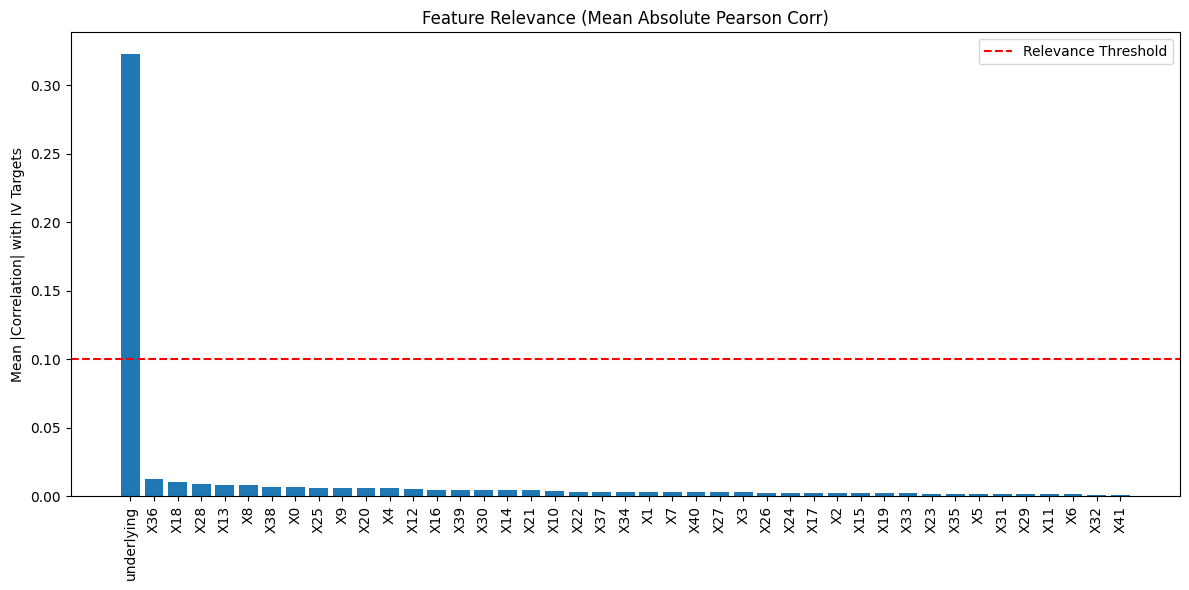

In [ ]:
import matplotlib.pyplot as plt

# Set a threshold for "relevance" (e.g., 0.1)
threshold = 0.10
ranked_features["is_relevant"] = ranked_features["mean_abs_corr"] > threshold

plt.figure(figsize=(12, 6))
plt.bar(ranked_features["feature"], ranked_features["mean_abs_corr"])
plt.xticks(rotation=90)
plt.axhline(threshold, color='red', linestyle='--', label="Relevance Threshold")
plt.title("Feature Relevance (Mean Absolute Pearson Corr)")
plt.ylabel("Mean |Correlation| with IV Targets")
plt.legend()
plt.tight_layout()
plt.show()